**<center><h1>Qi_Hui_Final_Project</h1></center>**

Name: Hui Qi
<br>
Github Username: yufeifeiqiqi
<br>
USC ID: 3206742781



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
# Prevent Google Colab from disconnecting
# Run this code in a cell and keep the tab open
# Press Ctrl+Shift+I (Windows) or Cmd+Opt+I (Mac) to open the developer console
# Paste the following code in the console and press Enter
function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
'''

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/project/data

In [2]:
!pip install tensorflow==2.9.3
import pandas as pd
import numpy as np
import cv2

import os
import shutil
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import EfficientNetB0, VGG16, ResNet50
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 116.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting un

In [3]:
print(tf.__version__)

2.9.3


**Data Exploration and Pre-processing**

In [4]:
# Set the seed for numpy and tensorflow
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# creating train / val /test
root_dir = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/'
new_root = 'split_data/'
classes = ['baseball', 'basketball', 'fencing', 'tennis', 'volleyball']

for cls in classes:
    os.makedirs(root_dir + new_root+ 'train/' + cls)
    os.makedirs(root_dir +new_root +'val/' + cls)
    os.makedirs(root_dir +new_root + 'test/' + cls)
    
## creating partition of the data after shuffeling

for cls in classes:
    src = root_dir + cls # folder to copy images from
    print(src)

    allFileNames = os.listdir(src)
    np.random.seed(42) 
    np.random.shuffle(allFileNames)

    ## here 0.70 = training ratio , (0.85-0.70) = validation ratio , (1-0.85) =  testign 
    train_FileNames,val_FileNames,test_FileNames = np.split(np.array(allFileNames),
                                                            [math.ceil(0.7*len(allFileNames)),
                                                             math.ceil(len(allFileNames)*0.85)])

    # #Converting file names from array to list

    train_FileNames = [src+'/'+ name for name in train_FileNames]
    val_FileNames = [src+'/' + name for name in val_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Training : '+ cls + ' '+str(len(train_FileNames)))
    print('Validation : '+ cls + ' ' +str(len(val_FileNames)))
    print('Testing : '+ cls + ' '+str(len(test_FileNames)))
    
    ## Copy pasting images to target directory

    for name in train_FileNames:
        shutil.copy(name, root_dir + new_root+'train/'+cls )


    for name in val_FileNames:
        shutil.copy(name, root_dir +new_root+'val/'+cls )


    for name in test_FileNames:
        shutil.copy(name,root_dir + new_root+'test/'+cls )

In [5]:
train_df = image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/train',
                                        label_mode = 'categorical',
                                        color_mode="rgb",
                                        batch_size=32,
                                        image_size = (224, 224), 
                                        shuffle = False,
                                        seed = 42)
val_df = image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/val',
                                        label_mode = 'categorical',
                                        color_mode="rgb",
                                        batch_size=32,
                                        image_size = (224, 224), 
                                        shuffle = False,
                                        seed = 42)
test_df = image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/test',
                                        label_mode = 'categorical',
                                        color_mode="rgb",
                                        batch_size=32,
                                        image_size = (224, 224), 
                                        shuffle = False,
                                        seed = 42)

Found 2311 files belonging to 5 classes.
Found 495 files belonging to 5 classes.
Found 493 files belonging to 5 classes.


**(ii) Image augmentation**

In [6]:
# https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Add our data-augmentation parameters to ImageDataGenerator
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
# this is the augmentation configuration we will use for testing:
# only rescaling
val_datagen = ImageDataGenerator(rescale = 1.0/255. )
test_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [7]:
# https://keras.io/zh/preprocessing/image/

train_dir = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images/split_data/test'

# Flow training images in batches of 5 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size = 5, 
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224),
                                                    shuffle = False,
                                                    seed=42)

# Flow validation images in batches of 5 using val_datagen generator
validation_generator = val_datagen.flow_from_directory( validation_dir,  
                                                        batch_size = 5, 
                                                        class_mode = 'categorical', 
                                                        target_size = (224, 224),
                                                        shuffle = False,
                                                        seed=42)

# Flow validation images in batches of 5 using test_datagen generator
test_generator = test_datagen.flow_from_directory( validation_dir,  
                                                        batch_size = 5, 
                                                        class_mode = 'categorical', 
                                                        target_size = (224, 224),
                                                        shuffle = False,
                                                        seed=42)

Found 2298 images belonging to 5 classes.
Found 494 images belonging to 5 classes.
Found 494 images belonging to 5 classes.


**(iii) Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable.**

In [38]:
# https://keras.io/guides/transfer_learning/
# https://keras.io/api/optimizers/
# https://towardsdatascience.com/fine-tuning-pre-trained-model-vgg-16-1277268c537f

# VGG16


vgg_conv = VGG16(input_shape = (224, 224, 3), # Shape of our images
                  include_top = False, # Leave out the last fully connected layer
                  weights = 'imagenet')

# remove the last layer and freeze the rest
base_model_vgg = Model(vgg_conv.input, vgg_conv.layers[-2].output)
base_model_vgg.trainable = False # Freeze the layer

58889256/58889256 [==============================] - 3s 0us/step


In [39]:
# use ReLU activation functions in the last layer and a softmax layer
model_vgg = Sequential()
model_vgg.add(base_model_vgg)
model_vgg.add(GlobalAveragePooling2D())
model_vgg.add(BatchNormalization())
model_vgg.add(Dense(200, activation = 'relu'))
model_vgg.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model_vgg.add(Dense(5, activation = 'softmax'))
model_vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 14, 14, 512)       14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 200)               102600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [8]:
# EfficientNetB0 
eff_conv = EfficientNetB0(weights = 'imagenet', input_shape = (224, 224, 3), include_top = False)
base_model_eff = Model(eff_conv.input, eff_conv.layers[-2].output)
base_model_eff.trainable = False

16705208/16705208 [==============================] - 2s 0us/step


In [9]:
model_eff = Sequential()
model_eff.add(base_model_eff)
model_eff.add(GlobalAveragePooling2D())
model_eff.add(BatchNormalization())
model_eff.add(Dense(200, activation = 'relu'))
model_eff.add(Dropout(0.2))
model_eff.add(Dense(5, activation = 'softmax'))
model_eff.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_eff.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 1280)        4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               256200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

In [74]:
# ResNet50
# https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b
res_conv = ResNet50(weights = 'imagenet', input_shape = (224, 224, 3), include_top = False)
base_model_res = Model(res_conv.input, res_conv.layers[-2].output)
base_model_res.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [75]:
model_res = Sequential()
model_res.add(base_model_res)
model_res.add(GlobalAveragePooling2D())
model_res.add(BatchNormalization())
model_res.add(Dense(200, activation = 'relu'))
model_res.add(Dropout(0.2))
model_res.add(Dense(5, activation = 'softmax'))
model_res.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_res.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 200)               409800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

**(iv) Train the networks ResNet50, EfficientNetB0, and VGG16 for at least 50 epochs (preferably 100 epochs) and perform early stopping using the valida- tion set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.**

In [ ]:
# https://www.projectpro.io/recipes/run-and-fit-data-with-keras-model
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# https://keunwoochoi.wordpress.com/2017/08/24/tip-fit_generator-in-keras-how-to-parallelise-correctly/


In [10]:
es = EarlyStopping(monitor = 'val_loss', 
                               mode = 'min',
                               verbose=0,
                               patience = 20, 
                               restore_best_weights = True)

**VGG16**

In [40]:
# VGG16
history_vgg = model_vgg.fit(train_generator, 
                            epochs = 100, 
                            batch_size = 5, 
                            validation_data = validation_generator, 
                            workers = 5,
                            use_multiprocessing = True,
                            callbacks = [es])

Epoch 1/100
460/460 [==============================] - 29s 58ms/step - loss: 1.5000 - accuracy: 0.3751 - val_loss: 1.3266 - val_accuracy: 0.4636
Epoch 2/100
460/460 [==============================] - 25s 54ms/step - loss: 1.0433 - accuracy: 0.5962 - val_loss: 1.3168 - val_accuracy: 0.5668
Epoch 3/100
460/460 [==============================] - 25s 54ms/step - loss: 0.8375 - accuracy: 0.6867 - val_loss: 1.2573 - val_accuracy: 0.5931
Epoch 4/100
460/460 [==============================] - 25s 54ms/step - loss: 0.7098 - accuracy: 0.7350 - val_loss: 1.3899 - val_accuracy: 0.5648
Epoch 5/100
460/460 [==============================] - 25s 53ms/step - loss: 0.6034 - accuracy: 0.7846 - val_loss: 1.3191 - val_accuracy: 0.5769
Epoch 6/100
460/460 [==============================] - 25s 54ms/step - loss: 0.5141 - accuracy: 0.8177 - val_loss: 1.5640 - val_accuracy: 0.5729
Epoch 7/100
460/460 [==============================] - 25s 53ms/step - loss: 0.4381 - accuracy: 0.8490 - val_loss: 1.2673 - val_ac

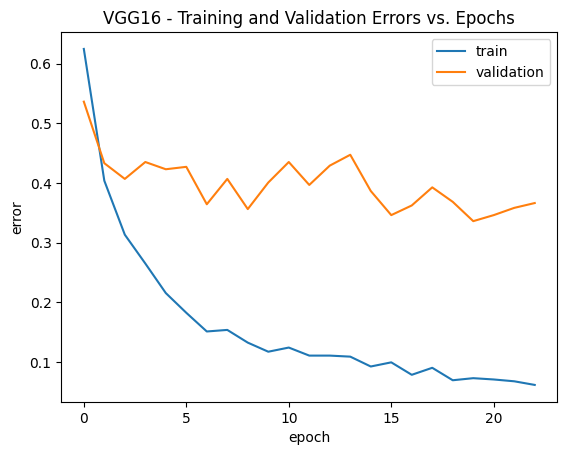

In [41]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy


train_accuracy_vgg = history_vgg.history['accuracy']
val_accuracy_vgg = history_vgg.history['val_accuracy']

train_error_vgg = []
val_error_vgg = []

for i in range(len(train_accuracy_vgg)):
    train_error_vgg.append(1 - train_accuracy_vgg[i])
    val_error_vgg.append(1 - val_accuracy_vgg[i])


plt.plot(train_error_vgg)
plt.plot(val_error_vgg)
plt.title('VGG16 - Training and Validation Errors vs. Epochs')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


**ResNet50**

In [76]:
# ResNet50

history_res = model_res.fit(train_generator, 
                            epochs = 100, 
                            batch_size = 5, 
                            validation_data = validation_generator, 
                            workers = 5,
                            use_multiprocessing = True,
                            callbacks = [es])

Epoch 1/100
460/460 [==============================] - 29s 52ms/step - loss: 3.4557 - accuracy: 0.2698 - val_loss: 3.0413 - val_accuracy: 0.2591
Epoch 2/100
460/460 [==============================] - 22s 47ms/step - loss: 2.7572 - accuracy: 0.3003 - val_loss: 2.5572 - val_accuracy: 0.2692
Epoch 3/100
460/460 [==============================] - 22s 47ms/step - loss: 1.9819 - accuracy: 0.3425 - val_loss: 2.1332 - val_accuracy: 0.2915
Epoch 4/100
460/460 [==============================] - 23s 48ms/step - loss: 1.6432 - accuracy: 0.3642 - val_loss: 1.9205 - val_accuracy: 0.3097
Epoch 5/100
460/460 [==============================] - 22s 47ms/step - loss: 1.5279 - accuracy: 0.3899 - val_loss: 1.7620 - val_accuracy: 0.3178
Epoch 6/100
460/460 [==============================] - 23s 48ms/step - loss: 1.3964 - accuracy: 0.4134 - val_loss: 1.6810 - val_accuracy: 0.3138
Epoch 7/100
460/460 [==============================] - 22s 48ms/step - loss: 1.4020 - accuracy: 0.4099 - val_loss: 1.5513 - val_ac

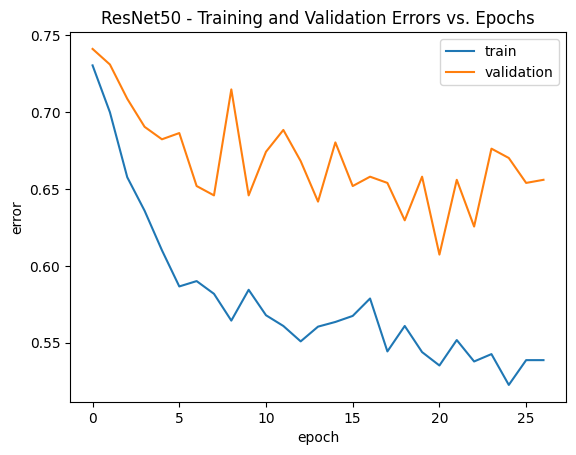

In [77]:
train_accuracy_res = history_res.history['accuracy']
val_accuracy_res = history_res.history['val_accuracy']

train_error_res = []
val_error_res = []

for i in range(len(train_accuracy_res)):
    train_error_res.append(1 - train_accuracy_res[i])
    val_error_res.append(1 - val_accuracy_res[i])


plt.plot(train_error_res)
plt.plot(val_error_res)
plt.title('ResNet50 - Training and Validation Errors vs. Epochs')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [11]:
# EfficientNetB0

history_eff = model_eff.fit(train_generator, 
                            epochs = 100, 
                            batch_size = 5, 
                            validation_data = validation_generator, 
                            workers = 5,
                            use_multiprocessing = True,
                            callbacks = [es])

Epoch 1/100
460/460 [==============================] - 309s 639ms/step - loss: 3.3903 - accuracy: 0.2089 - val_loss: 1.6435 - val_accuracy: 0.1700
Epoch 2/100
460/460 [==============================] - 21s 46ms/step - loss: 2.5864 - accuracy: 0.1950 - val_loss: 1.6216 - val_accuracy: 0.2287
Epoch 3/100
460/460 [==============================] - 21s 45ms/step - loss: 2.0685 - accuracy: 0.2067 - val_loss: 1.6096 - val_accuracy: 0.2166
Epoch 4/100
460/460 [==============================] - 21s 45ms/step - loss: 1.8435 - accuracy: 0.1945 - val_loss: 1.6152 - val_accuracy: 0.1518
Epoch 5/100
460/460 [==============================] - 21s 46ms/step - loss: 1.7098 - accuracy: 0.2180 - val_loss: 1.6057 - val_accuracy: 0.2186
Epoch 6/100
460/460 [==============================] - 22s 46ms/step - loss: 1.6559 - accuracy: 0.2154 - val_loss: 1.6081 - val_accuracy: 0.2227
Epoch 7/100
460/460 [==============================] - 24s 51ms/step - loss: 1.6356 - accuracy: 0.2037 - val_loss: 1.6075 - val_

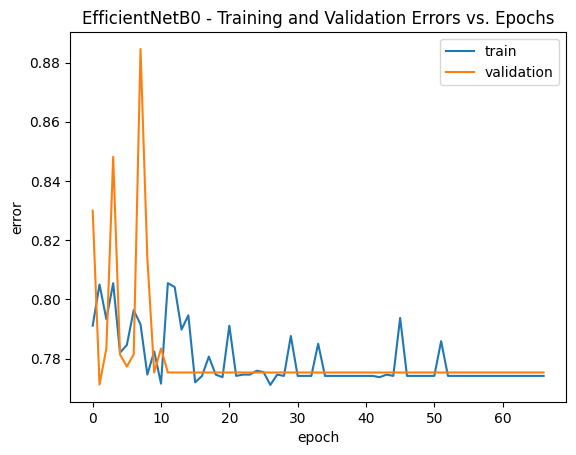

In [12]:
train_accuracy_eff = history_eff.history['accuracy']
val_accuracy_eff = history_eff.history['val_accuracy']

train_error_eff = []
val_error_eff = []

for i in range(len(train_accuracy_eff)):
    train_error_eff.append(1 - train_accuracy_eff[i])
    val_error_eff.append(1 - val_accuracy_eff[i])


plt.plot(train_error_eff)
plt.plot(val_error_eff)
plt.title('EfficientNetB0 - Training and Validation Errors vs. Epochs')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**(v) Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on both training and test sets. Remember that this is a multi-class classification problem.**

In [ ]:
# https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model
# https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_dataframe/
# https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax

# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

**VGG16 - test** 

In [42]:
# VGG16 - test 

y_prob = model_vgg.predict(test_generator) 
y_classes = y_prob.argmax(axis=-1)


99/99 [==============================] - 4s 37ms/step


In [43]:
print(classification_report(test_generator.classes, y_classes))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       111
           1       0.60      0.50      0.54        74
           2       0.49      0.56      0.52        95
           3       0.61      0.69      0.65       107
           4       0.65      0.43      0.52       107

    accuracy                           0.59       494
   macro avg       0.60      0.59      0.58       494
weighted avg       0.60      0.59      0.59       494



In [44]:
print('Confusion Matrix - VGG16 test \n')
print(confusion_matrix(y_true=test_generator.classes, y_pred=y_classes))


Confusion Matrix - VGG16 test 

[[83  5  8 13  2]
 [ 8 37  8 15  6]
 [22  3 53  9  8]
 [11  5  8 74  9]
 [ 7 12 32 10 46]]


In [45]:
print('VGG16 test Accuracy: %.3f' % accuracy_score(test_generator.classes, y_classes))

VGG16 test Accuracy: 0.593


**VGG16 train** 

In [46]:
y_prob = model_vgg.predict(train_generator) 
y_classes = y_prob.argmax(axis=-1)
print(classification_report(train_generator.classes, y_classes))

460/460 [==============================] - 34s 74ms/step
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       519
           1       0.69      0.50      0.58       344
           2       0.61      0.56      0.59       435
           3       0.52      0.68      0.59       500
           4       0.66      0.43      0.52       500

    accuracy                           0.59      2298
   macro avg       0.61      0.58      0.58      2298
weighted avg       0.60      0.59      0.58      2298



In [47]:
print('Confusion Matrix - VGG16 train \n')
print(confusion_matrix(y_true=train_generator.classes, y_pred=y_classes))


Confusion Matrix - VGG16 train 

[[371  15  24  87  22]
 [ 36 173  26  77  32]
 [ 75  11 245  75  29]
 [ 68  14  49 340  29]
 [112  38  56  77 217]]


In [48]:
print('VGG16 train Accuracy: %.3f' % accuracy_score(train_generator.classes, y_classes))

VGG16 train Accuracy: 0.586


**EfficientNetB0 train** 

In [13]:
y_prob = model_eff.predict(train_generator) 
y_classes = y_prob.argmax(axis=-1)
print(classification_report(train_generator.classes, y_classes))

460/460 [==============================] - 34s 71ms/step
              precision    recall  f1-score   support

           0       0.23      1.00      0.37       519
           1       0.00      0.00      0.00       344
           2       0.00      0.00      0.00       435
           3       0.00      0.00      0.00       500
           4       0.00      0.00      0.00       500

    accuracy                           0.23      2298
   macro avg       0.05      0.20      0.07      2298
weighted avg       0.05      0.23      0.08      2298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print('Confusion Matrix - EfficientNetB0 train \n')
print(confusion_matrix(y_true=train_generator.classes, y_pred=y_classes))


Confusion Matrix - EfficientNetB0 train 

[[519   0   0   0   0]
 [344   0   0   0   0]
 [435   0   0   0   0]
 [500   0   0   0   0]
 [500   0   0   0   0]]


In [15]:
print('EfficientNetB0 train Accuracy: %.3f' % accuracy_score(train_generator.classes, y_classes))

EfficientNetB0 train Accuracy: 0.226


**EfficientNetB0 test** 

In [16]:
y_prob = model_eff.predict(test_generator) 
y_classes = y_prob.argmax(axis=-1)


99/99 [==============================] - 2s 24ms/step


In [17]:
print(classification_report(test_generator.classes, y_classes))

              precision    recall  f1-score   support

           0       0.22      1.00      0.37       111
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       107

    accuracy                           0.22       494
   macro avg       0.04      0.20      0.07       494
weighted avg       0.05      0.22      0.08       494



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print('Confusion Matrix - EfficientNetB0 test \n')
print(confusion_matrix(y_true=test_generator.classes, y_pred=y_classes))


Confusion Matrix - EfficientNetB0 test 

[[111   0   0   0   0]
 [ 74   0   0   0   0]
 [ 95   0   0   0   0]
 [107   0   0   0   0]
 [107   0   0   0   0]]


In [19]:
print('EfficientNetB0 test Accuracy: %.3f' % accuracy_score(test_generator.classes, y_classes))

EfficientNetB0 test Accuracy: 0.225


**ResNet50 train** 

In [78]:
y_prob = model_res.predict(train_generator) 
y_classes = y_prob.argmax(axis=-1)
print(classification_report(train_generator.classes, y_classes))

460/460 [==============================] - 33s 69ms/step
              precision    recall  f1-score   support

           0       0.37      0.20      0.26       519
           1       0.27      0.29      0.28       344
           2       0.38      0.27      0.32       435
           3       0.28      0.37      0.32       500
           4       0.30      0.42      0.35       500

    accuracy                           0.31      2298
   macro avg       0.32      0.31      0.31      2298
weighted avg       0.32      0.31      0.31      2298



In [79]:
print('Confusion Matrix - ResNet50 train \n')
print(confusion_matrix(y_true=train_generator.classes, y_pred=y_classes))

Confusion Matrix - ResNet50 train 

[[103  70  48 165 133]
 [ 26  99  28  80 111]
 [ 33  52 118 122 110]
 [ 82  71  35 187 125]
 [ 32  76  81 103 208]]


In [80]:
print('ResNet50 train Accuracy: %.3f' % accuracy_score(train_generator.classes, y_classes))

ResNet50 train Accuracy: 0.311


**ResNet50 test** 

In [81]:
y_prob = model_res.predict(test_generator) 
y_classes = y_prob.argmax(axis=-1)
print(classification_report(test_generator.classes, y_classes))

99/99 [==============================] - 3s 29ms/step
              precision    recall  f1-score   support

           0       0.23      0.06      0.10       111
           1       0.36      0.45      0.40        74
           2       0.35      0.24      0.29        95
           3       0.30      0.39      0.34       107
           4       0.40      0.63      0.49       107

    accuracy                           0.35       494
   macro avg       0.33      0.35      0.32       494
weighted avg       0.32      0.35      0.32       494



In [82]:
print('Confusion Matrix - ResNet50 test \n')
print(confusion_matrix(y_true=test_generator.classes, y_pred=y_classes))

Confusion Matrix - ResNet50 test 

[[ 7 16 10 50 28]
 [ 1 33  8 13 19]
 [ 7 15 23 24 26]
 [15 13 11 42 26]
 [ 1 14 14 11 67]]


In [83]:
print('ResNet50 test Accuracy: %.3f' % accuracy_score(test_generator.classes, y_classes))

ResNet50 test Accuracy: 0.348


**(f) Video Classification Using Moving Averages**

**(i) In order to have a better deep learner, reuse the validation and test data and train the network, without seriously overfitting it. In the lectures, we saw how this can be done.**

In [ ]:
# https://machinelearningmastery.com/update-neural-network-models-with-more-data/
# https://stats.stackexchange.com/questions/352750/is-there-a-way-to-incorporate-new-data-into-an-already-trained-neural-network-wi



In [20]:
# retain with all train, validation, and test data

total_dir = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Images'
# this is same as the train_datagen
new_total_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

new_total_generator = new_total_datagen.flow_from_directory(total_dir, 
                                                    batch_size = 5, 
                                                    classes = ['baseball', 'basketball','fencing','tennis','volleyball'],
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224),
                                                    shuffle = False,
                                                    seed=42)

 

Found 3282 images belonging to 5 classes.


In [ ]:
new_total_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

**VGG16** 

In [49]:
# VGG16 
model_vgg.save('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_vgg_model.h5')


In [50]:
model_new_vgg = load_model('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_vgg_model.h5')

In [51]:
history_new_vgg = model_new_vgg.fit(new_total_generator,
                  epochs = 24, 
                  batch_size = 5,
                  workers = 5,
                  use_multiprocessing = True
                  )

Epoch 1/24
657/657 [==============================] - 29s 43ms/step - loss: 0.8886 - accuracy: 0.6661
Epoch 2/24
657/657 [==============================] - 28s 41ms/step - loss: 0.6666 - accuracy: 0.7566
Epoch 3/24
657/657 [==============================] - 28s 41ms/step - loss: 0.5737 - accuracy: 0.7956
Epoch 4/24
657/657 [==============================] - 28s 41ms/step - loss: 0.5003 - accuracy: 0.8178
Epoch 5/24
657/657 [==============================] - 28s 42ms/step - loss: 0.4435 - accuracy: 0.8440
Epoch 6/24
657/657 [==============================] - 27s 41ms/step - loss: 0.4315 - accuracy: 0.8507
Epoch 7/24
657/657 [==============================] - 28s 41ms/step - loss: 0.4083 - accuracy: 0.8531
Epoch 8/24
657/657 [==============================] - 28s 41ms/step - loss: 0.3341 - accuracy: 0.8851
Epoch 9/24
657/657 [==============================] - 28s 41ms/step - loss: 0.3171 - accuracy: 0.8857
Epoch 10/24
657/657 [==============================] - 28s 42ms/step - loss: 0.340

In [52]:
new_model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_vgg_model.h5'
model_new_vgg.save(new_model_path)

**ResNet50**

In [84]:
# ResNet50
model_res.save('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_res_model.h5')

In [85]:
model_new_res = load_model('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_res_model.h5')

In [86]:
history_new_res = model_new_res.fit(new_total_generator,
                                    epochs = 27, 
                                    batch_size = 5,
                                    workers = 5,
                                    use_multiprocessing = True
                                    )

Epoch 1/27
657/657 [==============================] - 30s 40ms/step - loss: 1.6150 - accuracy: 0.3565
Epoch 2/27
657/657 [==============================] - 25s 37ms/step - loss: 1.4262 - accuracy: 0.3952
Epoch 3/27
657/657 [==============================] - 26s 38ms/step - loss: 1.4190 - accuracy: 0.4077
Epoch 4/27
657/657 [==============================] - 26s 39ms/step - loss: 1.3991 - accuracy: 0.4138
Epoch 5/27
657/657 [==============================] - 25s 38ms/step - loss: 1.3928 - accuracy: 0.4180
Epoch 6/27
657/657 [==============================] - 26s 39ms/step - loss: 1.3792 - accuracy: 0.4095
Epoch 7/27
657/657 [==============================] - 26s 39ms/step - loss: 1.3706 - accuracy: 0.4205
Epoch 8/27
657/657 [==============================] - 26s 38ms/step - loss: 1.3403 - accuracy: 0.4470
Epoch 9/27
657/657 [==============================] - 27s 40ms/step - loss: 1.3428 - accuracy: 0.4305
Epoch 10/27
657/657 [==============================] - 26s 38ms/step - loss: 1.334

In [87]:
new_model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_res_model.h5'
model_new_res.save(new_model_path)

**EfficientNetB0**

In [21]:
# EfficientNetB0


In [ ]:
model_eff.save('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_eff_model.h5')

In [22]:
model_new_eff = load_model('/content/drive/MyDrive/Colab Notebooks/project/notebook/model/old_eff_model.h5')

In [23]:
history_new_eff = model_new_eff.fit(new_total_generator,
                                    epochs = 67, 
                                    batch_size = 5,
                                    workers = 5,
                                    use_multiprocessing = True)

Epoch 1/67
657/657 [==============================] - 318s 474ms/step - loss: 1.6000 - accuracy: 0.2258
Epoch 2/67
657/657 [==============================] - 26s 39ms/step - loss: 1.5999 - accuracy: 0.2258
Epoch 3/67
657/657 [==============================] - 26s 39ms/step - loss: 1.6000 - accuracy: 0.2258
Epoch 4/67
657/657 [==============================] - 25s 38ms/step - loss: 1.6002 - accuracy: 0.2258
Epoch 5/67
657/657 [==============================] - 27s 40ms/step - loss: 1.6000 - accuracy: 0.2258
Epoch 6/67
657/657 [==============================] - 25s 38ms/step - loss: 1.6000 - accuracy: 0.2258
Epoch 7/67
657/657 [==============================] - 26s 38ms/step - loss: 1.6001 - accuracy: 0.2258
Epoch 8/67
657/657 [==============================] - 26s 39ms/step - loss: 1.6001 - accuracy: 0.2258
Epoch 9/67
657/657 [==============================] - 26s 38ms/step - loss: 1.6000 - accuracy: 0.2105
Epoch 10/67
657/657 [==============================] - 27s 40ms/step - loss: 1.6

In [24]:
new_model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_eff_model.h5'
model_new_eff.save(new_model_path)

**(ii) & (iii) Apply at least L equally spaced frames of each video in the folder Sport Videos5 to your model to obtain L vectors of probability predictions from the softmax in your model. You must choose L to be at least 100, but you are welcome to use all the frames in each video. Calculate the average p ̄ of these probability vectors for each video. Select the class with maximum probability in the vector p ̄ for each video and compare it to the actual label of the video.** 

In [ ]:
# https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/?
# https://keras.io/examples/vision/video_classification/

In [88]:
class_names = list(new_total_generator.class_indices.keys())

print(class_names)

['baseball', 'basketball', 'fencing', 'tennis', 'volleyball']


In [89]:
class_dict = {"BaseballPitch": 'baseball', 
              "Basketball": 'basketball', 
              "Fencing": 'fencing', 
              "TennisSwing": 'tennis', 
              "VolleyballSpiking": 'volleyball'}

In [90]:
class_order = [class_dict[k] for k in sorted(class_dict)]
class_order

['baseball', 'basketball', 'fencing', 'tennis', 'volleyball']

In [ ]:
'''
# define the desired class order
class_order = ['BaseballPitch', 'Basketball', 'Fencing', 'TennisSwing', 'VolleyballSpiking']
'''

**VGG16**

In [53]:
# set the path to your video folder
video_folder = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Videos'

# set the path to your VGG16 model file
model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_vgg_model.h5'

# load the model
model = load_model(model_path)

# set the desired number of frames to extract per video
num_frames = 100

# set the desired frame rate
frame_rate = 1

# initialize empty lists to store the predicted and actual labels
predicted_labels = []
actual_labels = []


In [56]:
with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/vgg_predicted_labels.txt", "w") as predicted_file:
    with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/vgg_actual_labels.txt", "w") as actual_file:

        # loop over each video folder
        for video_class in sorted(os.listdir(video_folder)):
            print(f"Processing video class: {video_class}")
            class_path = os.path.join(video_folder, video_class)

            # get the corresponding label for the current video class
            if video_class in class_dict:
                class_label = class_dict[video_class]
            else:
                print(f"Warning: unknown video class '{video_class}'")
                continue
            
            # loop over each video file in the current class
            for video_file in os.listdir(class_path):
                video_path = os.path.join(class_path, video_file)
                #print(f"Processing video file: {video_file}")
                #print(video_path)

                # use OpenCV to read the video file
                cap = cv2.VideoCapture(video_path)

                if not os.path.exists(video_path):
                    print(f"Error: video file '{video_path}' does not exist")
                    continue

                if not cap.isOpened():
                    print(f"Error: could not read video file '{video_path}'")
                    continue

                # get the total number of frames in the video
                num_frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                #print(f"Total number of frames: {num_frames_total}")

                # determine the number of frames to skip between extractions
                frame_step = int(num_frames_total / num_frames)

                # initialize an empty list to store the probability vectors
                prob_vectors = []

                # loop over each frame in the video
                for i in range(num_frames_total):
                    ret, frame = cap.read()
                    #print(f"Frame {i} read: {ret}")
                    
                    # use continus instead of break here since if using break, no current pro_vectors, but
                    # we still have append an actural label not in this for loop
                    # but with continue, will directly jumpt to for i in range(num_frames_total)
                    # it is likely that all frams are read (ret == False), this for loop will end/exit 
                    # without going to the actural label.
                    if ret ==False:
                      continue


                    # check if the current frame index is a multiple of the desired frame rate
                    if i % frame_rate == 0:
                        # preprocess the frame
                        frame = cv2.resize(frame, (224, 224))
                        frame = frame.astype('float32') / 255.0
                        frame = np.expand_dims(frame, axis=0)

                        # get the probability predictions from the model
                        prob_vector = model.predict(frame, verbose=0)[0]
                        prob_vectors.append(prob_vector)

                    # check if we have already extracted the desired number of frames
                    if len(prob_vectors) == num_frames:
                        break

                    # skip frames according to the frame step
                    for j in range(frame_step):
                        ret = cap.grab()

                cap.release()

                # calculate the average probability vector for the video
                avg_prob_vector = np.mean(prob_vectors, axis=0)

                # print the average probability vector
                #print(f"Average probability vector for {video_file}:")
                #print(avg_prob_vector)

                # get the predicted label for the video
                predicted_label = np.argmax(avg_prob_vector)
                predicted_labels.append(predicted_label)
                

                if video_class in class_dict:
                    class_label = class_dict[video_class]
                    # get the actual label for the video
                    if class_label in class_order:
                        actual_label = class_order.index(class_label)
                        actual_labels.append(actual_label)
                        #print(f"Predicted label: {predicted_label}")
                        #print(f"Actual label: {actual_label}")
                    else:
                        print(f"Error: class label '{class_label}' not found in class order")
                        continue
                else:
                    print(f"Error: video class '{video_class} not found in class_dict")
                
                #print(predicted_labels)
                #print(actual_labels)
                predicted_file.write(f"{predicted_label}\n")
                actual_file.write(f"{actual_label}\n")

        print("Done")


Processing video class: BaseballPitch
Processing video class: Basketball
Processing video class: Fencing
Processing video class: TennisSwing
Processing video class: VolleyballSpiking
Done


In [57]:
len(actual_labels)

1158

In [58]:
len(predicted_labels)

1158

In [59]:
vgg_predicted_labels = predicted_labels
vgg_actual_labels = actual_labels

In [60]:

print(vgg_predicted_labels) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4, 2, 1, 2, 1, 1, 4, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 4, 3, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 

In [61]:
print(vgg_actual_labels) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

**EfficientNetB0**

In [65]:

# set the path to your video folder
video_folder = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Videos'

# set the path to your model file
model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_eff_model.h5'

# load the model
model = load_model(model_path)

# set the desired number of frames to extract per video
num_frames = 100

# set the desired frame rate
frame_rate = 1

# initialize empty lists to store the predicted and actual labels
predicted_labels = []
actual_labels = []


In [66]:
with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/eff_predicted_labels.txt", "w") as predicted_file:
    with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/eff_actual_labels.txt", "w") as actual_file:

        # loop over each video folder
        for video_class in sorted(os.listdir(video_folder)):
            print(f"Processing video class: {video_class}")
            class_path = os.path.join(video_folder, video_class)

            # get the corresponding label for the current video class
            if video_class in class_dict:
                class_label = class_dict[video_class]
            else:
                print(f"Warning: unknown video class '{video_class}'")
                continue
            
            # loop over each video file in the current class
            for video_file in os.listdir(class_path):
                video_path = os.path.join(class_path, video_file)
                #print(f"Processing video file: {video_file}")
                #print(video_path)

                # use OpenCV to read the video file
                cap = cv2.VideoCapture(video_path)

                if not os.path.exists(video_path):
                    print(f"Error: video file '{video_path}' does not exist")
                    continue

                if not cap.isOpened():
                    print(f"Error: could not read video file '{video_path}'")
                    continue

                # get the total number of frames in the video
                num_frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                #print(f"Total number of frames: {num_frames_total}")

                # determine the number of frames to skip between extractions
                frame_step = int(num_frames_total / num_frames)

                # initialize an empty list to store the probability vectors
                prob_vectors = []

                # loop over each frame in the video
                for i in range(num_frames_total):
                    ret, frame = cap.read()
                    #print(f"Frame {i} read: {ret}")
                    
                    # use continus instead of break here since if using break, no current pro_vectors, but
                    # we still have append an actural label not in this for loop
                    # but with continue, will directly jumpt to for i in range(num_frames_total)
                    # it is likely that all frams are read (ret == False), this for loop will end/exit 
                    # without going to the actural label.
                    if ret ==False:
                      continue


                    # check if the current frame index is a multiple of the desired frame rate
                    if i % frame_rate == 0:
                        # preprocess the frame
                        frame = cv2.resize(frame, (224, 224))
                        frame = frame.astype('float32') / 255.0
                        frame = np.expand_dims(frame, axis=0)

                        # get the probability predictions from the model
                        prob_vector = model.predict(frame, verbose=0)[0]
                        prob_vectors.append(prob_vector)

                    # check if we have already extracted the desired number of frames
                    if len(prob_vectors) == num_frames:
                        break

                    # skip frames according to the frame step
                    for j in range(frame_step):
                        ret = cap.grab()

                cap.release()

                # calculate the average probability vector for the video
                avg_prob_vector = np.mean(prob_vectors, axis=0)

                # print the average probability vector
                #print(f"Average probability vector for {video_file}:")
                #print(avg_prob_vector)

                # get the predicted label for the video
                predicted_label = np.argmax(avg_prob_vector)
                predicted_labels.append(predicted_label)
                

                if video_class in class_dict:
                    class_label = class_dict[video_class]
                    # get the actual label for the video
                    if class_label in class_order:
                        actual_label = class_order.index(class_label)
                        actual_labels.append(actual_label)
                        #print(f"Predicted label: {predicted_label}")
                        #print(f"Actual label: {actual_label}")
                    else:
                        print(f"Error: class label '{class_label}' not found in class order")
                        continue
                else:
                    print(f"Error: video class '{video_class} not found in class_dict")
                
                #print(predicted_labels)
                #print(actual_labels)
                predicted_file.write(f"{predicted_label}\n")
                actual_file.write(f"{actual_label}\n")

        print("Done")

Processing video class: BaseballPitch
Processing video class: Basketball
Processing video class: Fencing
Processing video class: TennisSwing
Processing video class: VolleyballSpiking
Done


In [67]:
eff_predicted_labels = predicted_labels
eff_actual_labels = actual_labels

In [68]:
len(eff_predicted_labels)

685

In [69]:
print(eff_predicted_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**ResNet50**

In [91]:
# set the path to your video folder
video_folder = '/content/drive/MyDrive/Colab Notebooks/project/data/Sport_Videos'

# set the path to your model file
model_path = '/content/drive/MyDrive/Colab Notebooks/project/notebook/model/new_res_model.h5'

# load the model
model = load_model(model_path)

# set the desired number of frames to extract per video
num_frames = 100

# set the desired frame rate
frame_rate = 1

# initialize empty lists to store the predicted and actual labels
predicted_labels = []
actual_labels = []

In [92]:
with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/res_predicted_labels.txt", "w") as predicted_file:
    with open("/content/drive/MyDrive/Colab Notebooks/project/notebook/labels/res_actual_labels.txt", "w") as actual_file:

        # loop over each video folder
        for video_class in sorted(os.listdir(video_folder)):
            print(f"Processing video class: {video_class}")
            class_path = os.path.join(video_folder, video_class)

            # get the corresponding label for the current video class
            if video_class in class_dict:
                class_label = class_dict[video_class]
            else:
                print(f"Warning: unknown video class '{video_class}'")
                continue
            
            # loop over each video file in the current class
            for video_file in os.listdir(class_path):
                video_path = os.path.join(class_path, video_file)
                #print(f"Processing video file: {video_file}")
                #print(video_path)

                # use OpenCV to read the video file
                cap = cv2.VideoCapture(video_path)

                if not os.path.exists(video_path):
                    print(f"Error: video file '{video_path}' does not exist")
                    continue

                if not cap.isOpened():
                    print(f"Error: could not read video file '{video_path}'")
                    continue

                # get the total number of frames in the video
                num_frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                #print(f"Total number of frames: {num_frames_total}")

                # determine the number of frames to skip between extractions
                frame_step = int(num_frames_total / num_frames)

                # initialize an empty list to store the probability vectors
                prob_vectors = []

                # loop over each frame in the video
                for i in range(num_frames_total):
                    ret, frame = cap.read()
                    #print(f"Frame {i} read: {ret}")
                    
                    # use continus instead of break here since if using break, no current pro_vectors, but
                    # we still have append an actural label not in this for loop
                    # but with continue, will directly jumpt to for i in range(num_frames_total)
                    # it is likely that all frams are read (ret == False), this for loop will end/exit 
                    # without going to the actural label.
                    if ret ==False:
                      continue


                    # check if the current frame index is a multiple of the desired frame rate
                    if i % frame_rate == 0:
                        # preprocess the frame
                        frame = cv2.resize(frame, (224, 224))
                        frame = frame.astype('float32') / 255.0
                        frame = np.expand_dims(frame, axis=0)

                        # get the probability predictions from the model
                        prob_vector = model.predict(frame, verbose=0)[0]
                        prob_vectors.append(prob_vector)

                    # check if we have already extracted the desired number of frames
                    if len(prob_vectors) == num_frames:
                        break

                    # skip frames according to the frame step
                    for j in range(frame_step):
                        ret = cap.grab()

                cap.release()

                # calculate the average probability vector for the video
                avg_prob_vector = np.mean(prob_vectors, axis=0)

                # print the average probability vector
                #print(f"Average probability vector for {video_file}:")
                #print(avg_prob_vector)

                # get the predicted label for the video
                predicted_label = np.argmax(avg_prob_vector)
                predicted_labels.append(predicted_label)
                

                if video_class in class_dict:
                    class_label = class_dict[video_class]
                    # get the actual label for the video
                    if class_label in class_order:
                        actual_label = class_order.index(class_label)
                        actual_labels.append(actual_label)
                        #print(f"Predicted label: {predicted_label}")
                        #print(f"Actual label: {actual_label}")
                    else:
                        print(f"Error: class label '{class_label}' not found in class order")
                        continue
                else:
                    print(f"Error: video class '{video_class} not found in class_dict")
                
                #print(predicted_labels)
                #print(actual_labels)
                predicted_file.write(f"{predicted_label}\n")
                actual_file.write(f"{actual_label}\n")

        print("Done")

Processing video class: BaseballPitch
Processing video class: Basketball
Processing video class: Fencing
Processing video class: TennisSwing
Processing video class: VolleyballSpiking
Done


In [93]:
res_predicted_labels = predicted_labels
res_actual_labels = actual_labels

In [94]:
len(res_predicted_labels)

685

In [95]:
print(res_predicted_labels)

[2, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 1, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 0, 0, 2, 2, 0, 2, 2, 2, 4, 2, 4, 4, 2, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 2, 4, 2, 3, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 2, 2, 2, 4, 3, 0, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 0, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 2, 2, 4, 3, 4, 3, 2, 2, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 0, 4, 


**(iv) Report the Confusion Matrix, Precision, Recall, Accuracy, and F1 score for your model on the test data, i.e. videos. Remember that this is a multi-class classification problem.**


**VGG16**

In [ ]:
# VGG16

In [62]:
print(classification_report(vgg_actual_labels, vgg_predicted_labels))

              precision    recall  f1-score   support

           0       0.34      0.93      0.50       300
           1       0.21      0.05      0.08       274
           2       0.53      0.23      0.33       222
           3       0.44      0.23      0.30       246
           4       0.39      0.18      0.25       116

    accuracy                           0.36      1158
   macro avg       0.38      0.32      0.29      1158
weighted avg       0.37      0.36      0.30      1158



In [63]:
print('Confusion Matrix - VGG16 Video \n')
print(confusion_matrix(y_true=vgg_actual_labels, y_pred= vgg_predicted_labels))

Confusion Matrix - VGG16 Video 

[[278   2   8  12   0]
 [192  14  22  22  24]
 [136   8  52  24   2]
 [153  30   0  56   7]
 [ 51  14  16  14  21]]


In [64]:
print('VGG16 Video Classification Accuracy: %.3f' % accuracy_score(vgg_actual_labels, vgg_predicted_labels))

VGG16 Video Classification Accuracy: 0.364


**EfficientNetB0**

In [70]:
print(classification_report(eff_actual_labels, eff_predicted_labels))

              precision    recall  f1-score   support

           0       0.22      1.00      0.36       150
           1       0.00      0.00      0.00       137
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       171
           4       0.00      0.00      0.00       116

    accuracy                           0.22       685
   macro avg       0.04      0.20      0.07       685
weighted avg       0.05      0.22      0.08       685



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print('Confusion Matrix - EfficientNetB0 Video \n')
print(confusion_matrix(y_true=eff_actual_labels, y_pred= eff_predicted_labels))

Confusion Matrix - EfficientNetB0 Video 

[[150   0   0   0   0]
 [137   0   0   0   0]
 [111   0   0   0   0]
 [171   0   0   0   0]
 [116   0   0   0   0]]


In [72]:
print('EfficientNetB0 Video Classification Accuracy: %.3f' % accuracy_score(eff_actual_labels, eff_predicted_labels))

EfficientNetB0 Video Classification Accuracy: 0.219


**ResNet50**

In [96]:
print(classification_report(res_actual_labels, res_predicted_labels))

              precision    recall  f1-score   support

           0       0.30      0.05      0.08       150
           1       0.00      0.00      0.00       137
           2       0.18      0.08      0.11       111
           3       0.31      0.58      0.40       171
           4       0.14      0.34      0.20       116

    accuracy                           0.22       685
   macro avg       0.19      0.21      0.16       685
weighted avg       0.20      0.22      0.17       685



In [97]:
print('Confusion Matrix - ResNet50 Video \n')
print(confusion_matrix(y_true=res_actual_labels, y_pred= res_predicted_labels))

Confusion Matrix - ResNet50 Video 

[[ 7  1 20 55 67]
 [ 4  0 16 73 44]
 [ 3  3  9 22 74]
 [ 7  5  5 99 55]
 [ 2  0  1 74 39]]


In [98]:
print('ResNet50 Video Classification Accuracy: %.3f' % accuracy_score(res_actual_labels, res_predicted_labels))

ResNet50 Video Classification Accuracy: 0.225


**Reference** <br>
https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/?  <br>
https://keras.io/examples/vision/video_classification/ <br>
https://machinelearningmastery.com/update-neural-network-models-with-more-data/ <br>
https://stats.stackexchange.com/questions/352750/is-there-a-way-to-incorporate-new-data-into-an-already-trained-neural-network-wi <br>
https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model <br>
https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_dataframe/ <br>
https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax <br>
https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br>
https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy <br>
https://www.projectpro.io/recipes/run-and-fit-data-with-keras-model <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit <br>
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ <br>
https://keunwoochoi.wordpress.com/2017/08/24/tip-fit_generator-in-keras-how-to-parallelise-correctly/ <br>
https://medium.com/@kenneth.ca95/a-guide-to-transfer-learning-with-keras-using-resnet50-a81a4a28084b <br>
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ <br>
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator <br>
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html <br>
https://keras.io/zh/preprocessing/image/ <br>
https://keras.io/guides/transfer_learning/ <br>
https://keras.io/api/optimizers/ <br>
https://towardsdatascience.com/fine-tuning-pre-trained-model-vgg-16-1277268c537f <br>




